In [1]:
%pwd

'C:\\Users\\llaur\\OneDrive\\Desktop\\research\\COLLECTED DATA'

# Deal or No Deal Research Project

Here's all the data processing and analysis for the data from our collected study. I built a Javascript online game of Deal or No Deal and collected data from participants in the study using a Python Flask API hosted on the Google Cloud Platform. That data is linked to Qualtrics responses via Game IDs, automatically generated by the game. The raw data file is called `raw_data.txt` and the qualtrics responses in the csv are anonymized.

In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import math

# Data Processing

Import the data that was written by the backend API into the text file with each line being a new entry. Process each line and save it to a list of dictionaries.

In [5]:
list_of_dicts = []

with open('raw_data.txt', "r") as f_in:
    list_of_dicts = [json.loads(line.strip().replace("\'", "\"").replace("True", "\"True\"").replace("False", "\"False\"")) for line in f_in]
#     for line in f_in:
#         # Remove newline characters and replace single quotes with double quotes
#         line = line.strip()
#         line = line.replace("\'", "\"")
#         line = line.replace("True", "\"True\"") # javascript sent the boolean values to the Python API without quotation marks
#         line = line.replace("False", "\"False\"")
#         list_of_dicts.append(line)
        
# Print one of the dictionaries in the list
print(list_of_dicts[0])

{'1': [0.01, 1, 5, 25, 50, 75, 200, 400, 500, 1000, 5000, 10000, 50000, 100000, 200000, 300000, 400000, 500000, 750000, 1000000], '2': [0.01, 1, 5, 50, 75, 400, 500, 5000, 10000, 50000, 100000, 200000, 300000, 500000, 750000], '3': [0.01, 1, 5, 75, 500, 10000, 50000, 100000, 200000, 300000, 500000], '4': [1, 5, 75, 10000, 100000, 200000, 300000, 500000], '5': [1, 5, 75, 10000, 300000, 500000], '6': [1, 75, 10000, 300000, 500000], 'bo1': 38973, 'po1': 4500000, 'bo2': 46063, 'po2': 4000000, 'bo3': 53588, 'po3': 500000, 'bo4': 90778, 'po4': 85565375, 'bo5': 104761, 'po5': 400000, 'bo6': 136668, 'po6': 6000, 'result': 'D', 'end_round': 6, 'winnings': 6000, 'game_id': 'G96845'}


Turn it into a dataframe to work with it more easily.

In [6]:
df = pd.DataFrame(list_of_dicts)
data = pd.json_normalize(df.to_dict(orient='records'))
data.shape

(1587, 32)

Get an idea of all the columns we have

In [7]:
data.columns

Index(['1', '2', '3', '4', '5', '6', 'bo1', 'po1', 'bo2', 'po2', 'bo3', 'po3',
       'bo4', 'po4', 'bo5', 'po5', 'bo6', 'po6', 'result', 'end_round',
       'winnings', 'game_id', '7', '8', '9', 'bo7', 'po7', 'bo8', 'po8', 'bo9',
       'po9', 'first_game'],
      dtype='object')

Delete the entries that aren't linked to Qualtrics responses

First import the data from the study, which was exported from Qualtrics

In [8]:
qualtrics = pd.read_csv('Decision Making_October 9, 2023_00.39.csv')
qualtrics.head(10)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q31,Q30,Q29,Q28,Q27,Q26,Q8,Q22,Q22.1,Q23
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,If the chance of getting a disease is 20 out o...,"Imagine that we roll a fair, six-sided die 100...","In the BIG BUCKS LOTTERY, the chances of winni...","In the ACME PUBLISHING SWEEPSTAKES, the chance...","In a lake, there is a patch of lily pads. Ever...",If it takes five machines 5 minutes to make fi...,Suppose you have a close friend who has a lump...,Are you familiar with the game Deal or No Deal?,Enter your first game ID (G#####),Enter your second game ID (G#####)
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID34_TEXT""}","{""ImportId"":""QID33_TEXT""}","{""ImportId"":""QID32_TEXT""}","{""ImportId"":""QID31_TEXT""}","{""ImportId"":""QID30_TEXT""}","{""ImportId"":""QID29_TEXT""}","{""ImportId"":""QID7_TEXT""}","{""ImportId"":""QID22""}","{""ImportId"":""QID25_TEXT""}","{""ImportId"":""QID26_TEXT""}"
2,2023-06-16 11:44:54,2023-06-16 11:47:35,IP Address,24.228.238.109,78,161,False,2023-06-23 11:47:40,R_3su0Ltne29zNSjJ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
3,2023-07-05 13:02:23,2023-07-05 13:12:28,IP Address,47.155.28.7,81,605,False,2023-07-12 13:12:33,R_V3adGClNwIKHEKR,NaN,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2023-08-24 21:46:46,2023-08-24 21:47:49,IP Address,68.181.16.181,100,62,True,2023-08-24 21:47:50,R_reia0IEJiOWKfT3,NaN,...,1000,1000,1000,1000,1000,10000,10000,No,3,3
5,2023-08-31 16:22:11,2023-08-31 16:27:58,IP Address,207.151.52.169,100,347,True,2023-08-31 16:27:59,R_SNJOxOzIBVlJchH,NaN,...,20,500,10,.1,47,5,50,Yes,111,2122
6,2023-08-24 21:48:44,2023-08-25 00:38:43,IP Address,68.181.16.181,4,10198,False,2023-09-01 00:38:49,R_pN9gvr2q8XzUXap,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2023-09-07 17:34:28,2023-09-07 17:41:15,IP Address,68.181.16.80,100,407,True,2023-09-07 17:41:16,R_1FsJAFREJ8ZcSi5,NaN,...,20,500,100,0.001,47,1,9,Yes,G61742,G37411
8,2023-09-07 17:33:07,2023-09-07 17:45:19,IP Address,207.151.52.139,100,731,True,2023-09-07 17:45:20,R_3GkrBHRQO78S3F3,NaN,...,20,500,10,0.1,47,5,50,No,G98688,G77438
9,2023-09-07 17:46:19,2023-09-07 17:54:04,IP Address,68.181.16.140,100,464,True,2023-09-07 17:54:04,R_296Up7NaeLaPjAb,NaN,...,20,500,10,0.1,47,5,50,Yes,G61803,G93864


In [9]:
qualtrics.shape

(395, 44)

Isolate the two columns that have the Game ID's that will be used to filter the data df

In [10]:
g1 = qualtrics['Q22.1']
g2 = qualtrics['Q23']

In [11]:
g1

0      Enter your first game ID (G#####)
1              {"ImportId":"QID25_TEXT"}
2                                    NaN
3                                    NaN
4                                      3
                     ...                
390                               G78643
391                               G63829
392                                55513
393                               G93458
394                               G95641
Name: Q22.1, Length: 395, dtype: object

Filter out rows in data whose game ID's don't match a response from a participant in the Qualtrics survey

In [12]:
data = data[data['game_id'].isin(g1) | data['game_id'].isin(g2)]
data.shape

(558, 32)

Delete the rows from qualtrics data that aren't real game numbers

In [13]:
data['game_id']

55      G95242
58      G61742
59      G37411
60      G98688
61      G77438
         ...  
799     G71230
800     G95641
801     G11000
1096    G78841
1395    G10097
Name: game_id, Length: 558, dtype: object

### Number of filtered, valid solutions

In [14]:
qualtrics = qualtrics[qualtrics['Q22.1'].isin(data['game_id'])]
qualtrics.shape

(288, 44)

In [15]:
qualtrics = qualtrics[qualtrics['Q23'].isin(data['game_id'])]
qualtrics.shape

(275, 44)

That's the number of responses where both games they listed is actually in the data.txt file

In [16]:
# qualtrics.to_csv('played.csv')

## Merge with Qualtrics Responses

In [17]:
qualtrics.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q31,Q30,Q29,Q28,Q27,Q26,Q8,Q22,Q22.1,Q23
7,2023-09-07 17:34:28,2023-09-07 17:41:15,IP Address,68.181.16.80,100,407,True,2023-09-07 17:41:16,R_1FsJAFREJ8ZcSi5,NaN,...,20,500,100,0.001,47,1,9,Yes,G61742,G37411
8,2023-09-07 17:33:07,2023-09-07 17:45:19,IP Address,207.151.52.139,100,731,True,2023-09-07 17:45:20,R_3GkrBHRQO78S3F3,NaN,...,20,500,10,0.1,47,5,50,No,G98688,G77438
9,2023-09-07 17:46:19,2023-09-07 17:54:04,IP Address,68.181.16.140,100,464,True,2023-09-07 17:54:04,R_296Up7NaeLaPjAb,NaN,...,20,500,10,0.1,47,5,50,Yes,G61803,G93864


Separate games based on whether they were played first or second. Merge accordingly

Filter second games played

In [18]:
data2 = data[data['first_game']=="False"]
data2.shape

(271, 32)

In [19]:
for colname in data2.columns:
    data2 = data2.rename(columns={colname: colname+"_g2"})
data2.head(1)

,1_g2,2_g2,3_g2,4_g2,5_g2,6_g2,bo1_g2,po1_g2,bo2_g2,po2_g2,...,7_g2,8_g2,9_g2,bo7_g2,po7_g2,bo8_g2,po8_g2,bo9_g2,po9_g2,first_game_g2
55,"[1, 5, 10, 25, 50, 75, 100, 300, 400, 500, 750...","[1, 5, 10, 25, 75, 300, 400, 500, 1000, 5000, ...","[1, 5, 25, 75, 400, 500, 1000, 25000, 50000, 1...",NaN,NaN,NaN,17259,NaN,26153.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


Merge so that the G2 ID matches the ID from data2

In [20]:
df2 = pd.merge(qualtrics, data2, left_on='Q23', right_on='game_id_g2')
df2.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,7_g2,8_g2,9_g2,bo7_g2,po7_g2,bo8_g2,po8_g2,bo9_g2,po9_g2,first_game_g2
0,2023-09-07 17:33:07,2023-09-07 17:45:19,IP Address,207.151.52.139,100,731,True,2023-09-07 17:45:20,R_3GkrBHRQO78S3F3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2023-09-07 17:46:19,2023-09-07 17:54:04,IP Address,68.181.16.140,100,464,True,2023-09-07 17:54:04,R_296Up7NaeLaPjAb,NaN,...,"[25, 200, 750, 1000000]","[200, 750, 1000000]","[200, 750]",228968.0,500000.0,331573.0,500000.0,543.0,500.0,False
2,2023-09-07 17:53:21,2023-09-07 18:05:34,IP Address,172.89.173.1,100,732,True,2023-09-07 18:05:35,R_27VEsjDi7DG83tj,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2023-09-07 18:24:28,2023-09-07 18:32:34,IP Address,12.145.98.24,100,485,True,2023-09-07 18:32:34,R_1K11rAviOSJl8QU,NaN,...,"[400, 75000, 750000, 1000000]","[400, 75000, 750000]","[400, 750000]",415300.0,NaN,273895.0,NaN,405595.0,NaN,False
4,2023-09-07 18:32:33,2023-09-07 18:36:58,IP Address,76.53.143.234,100,264,True,2023-09-07 18:36:58,R_3RfNf65CmwJ4WJc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [21]:
df2.shape

(257, 76)

Filter 1st games played

In [22]:
data1 = data[data['first_game']=="True"]
data1.shape

(287, 32)

In [23]:
for colname in data1.columns:
    data1 = data1.rename(columns={colname: colname+"_g1"})
data1.head(1)

,1_g1,2_g1,3_g1,4_g1,5_g1,6_g1,bo1_g1,po1_g1,bo2_g1,po2_g1,...,7_g1,8_g1,9_g1,bo7_g1,po7_g1,bo8_g1,po8_g1,bo9_g1,po9_g1,first_game_g1
58,"[0.01, 1, 5, 10, 25, 50, 75, 100, 400, 500, 75...",NaN,NaN,NaN,NaN,NaN,30473,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [24]:
df2.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q24', 'Q1', 'Q2', 'Q3',
       'Q3_3_TEXT', 'id', 'Q4', 'Q5', 'Q10', 'Q12', 'Q11', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q17', 'Q32', 'Q31', 'Q30', 'Q29', 'Q28', 'Q27', 'Q26', 'Q8',
       'Q22', 'Q22.1', 'Q23', '1_g2', '2_g2', '3_g2', '4_g2', '5_g2', '6_g2',
       'bo1_g2', 'po1_g2', 'bo2_g2', 'po2_g2', 'bo3_g2', 'po3_g2', 'bo4_g2',
       'po4_g2', 'bo5_g2', 'po5_g2', 'bo6_g2', 'po6_g2', 'result_g2',
       'end_round_g2', 'winnings_g2', 'game_id_g2', '7_g2', '8_g2', '9_g2',
       'bo7_g2', 'po7_g2', 'bo8_g2', 'po8_g2', 'bo9_g2', 'po9_g2',
       'first_game_g2'],
      dtype='object')

Filter 1st game played

In [25]:
df2[['Q22.1', 'Q23']].head()

,Q22.1,Q23
0,G98688,G77438
1,G61803,G93864
2,G67540,G41566
3,G24239,G59548
4,G57417,G91988


In [26]:
data1[['game_id_g1']].head()

,game_id_g1
58,G61742
59,G37411
60,G98688
62,G61803
67,G67540


Merge so that the col from qualtrics asking for G1 ID matches ID's from data filtered for 1st game played

In [27]:
df = pd.merge(df2, data1, left_on='Q22.1', right_on='game_id_g1')
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,7_g1,8_g1,9_g1,bo7_g1,po7_g1,bo8_g1,po8_g1,bo9_g1,po9_g1,first_game_g1
0,2023-09-07 17:33:07,2023-09-07 17:45:19,IP Address,207.151.52.139,100,731,True,2023-09-07 17:45:20,R_3GkrBHRQO78S3F3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,2023-09-07 17:46:19,2023-09-07 17:54:04,IP Address,68.181.16.140,100,464,True,2023-09-07 17:54:04,R_296Up7NaeLaPjAb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,2023-09-07 17:53:21,2023-09-07 18:05:34,IP Address,172.89.173.1,100,732,True,2023-09-07 18:05:35,R_27VEsjDi7DG83tj,NaN,...,"[0.01, 300, 10000, 75000]","[0.01, 300, 10000]","[300, 10000]",19947.0,10000.0,3553.0,10000.0,5784.0,10000.0,True
3,2023-09-07 18:24:28,2023-09-07 18:32:34,IP Address,12.145.98.24,100,485,True,2023-09-07 18:32:34,R_1K11rAviOSJl8QU,NaN,...,"[25, 100, 75000, 400000]","[25, 75000, 400000]","[25, 400000]",109412.0,100000.0,158414.0,100000.0,217442.0,100000.0,True
4,2023-09-07 18:32:33,2023-09-07 18:36:58,IP Address,76.53.143.234,100,264,True,2023-09-07 18:36:58,R_3RfNf65CmwJ4WJc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [28]:
df.shape

(257, 108)

Fix column names to avoid confusion

In [29]:
for col in df.columns:
    print(col, end=" ")

StartDate EndDate Status IPAddress Progress Duration (in seconds) Finished RecordedDate ResponseId RecipientLastName RecipientFirstName RecipientEmail ExternalReference LocationLatitude LocationLongitude DistributionChannel UserLanguage Q24 Q1 Q2 Q3 Q3_3_TEXT id Q4 Q5 Q10 Q12 Q11 Q13 Q14 Q15 Q16 Q17 Q32 Q31 Q30 Q29 Q28 Q27 Q26 Q8 Q22 Q22.1 Q23 1_g2 2_g2 3_g2 4_g2 5_g2 6_g2 bo1_g2 po1_g2 bo2_g2 po2_g2 bo3_g2 po3_g2 bo4_g2 po4_g2 bo5_g2 po5_g2 bo6_g2 po6_g2 result_g2 end_round_g2 winnings_g2 game_id_g2 7_g2 8_g2 9_g2 bo7_g2 po7_g2 bo8_g2 po8_g2 bo9_g2 po9_g2 first_game_g2 1_g1 2_g1 3_g1 4_g1 5_g1 6_g1 bo1_g1 po1_g1 bo2_g1 po2_g1 bo3_g1 po3_g1 bo4_g1 po4_g1 bo5_g1 po5_g1 bo6_g1 po6_g1 result_g1 end_round_g1 winnings_g1 game_id_g1 7_g1 8_g1 9_g1 bo7_g1 po7_g1 bo8_g1 po8_g1 bo9_g1 po9_g1 first_game_g1 

In [30]:
df.drop(columns=['Q24', 'StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName',
       'RecipientFirstName', 'RecipientEmail', 'ExternalReference',
       'LocationLatitude', 'LocationLongitude', 'DistributionChannel',
       'UserLanguage','first_game_g1', 'first_game_g2'])

,IPAddress,Q1,Q2,Q3,Q3_3_TEXT,id,Q4,Q5,Q10,Q12,...,game_id_g1,7_g1,8_g1,9_g1,bo7_g1,po7_g1,bo8_g1,po8_g1,bo9_g1,po9_g1
0,207.151.52.139,20,14,Female,NaN,NaN,No,NaN,3,4,...,G98688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68.181.16.140,21,15,Male,NaN,NaN,No,NaN,5,5,...,G61803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,172.89.173.1,28,15,Male,NaN,NaN,Yes,No,4,4,...,G67540,"[0.01, 300, 10000, 75000]","[0.01, 300, 10000]","[300, 10000]",19947.0,10000.0,3553.0,10000.0,5784.0,10000.0
3,12.145.98.24,19,19,Male,NaN,NaN,Yes,Yes,3,3,...,G24239,"[25, 100, 75000, 400000]","[25, 75000, 400000]","[25, 400000]",109412.0,100000.0,158414.0,100000.0,217442.0,100000.0
4,76.53.143.234,20,14,Female,NaN,NaN,No,NaN,4,5,...,G57417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,108.199.164.190,22,15,Male,NaN,NaN,Yes,No,4,5,...,G16298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,68.73.213.244,24,14,Male,NaN,NaN,No,NaN,3,5,...,G63829,"[1, 5, 500000, 750000]","[1, 5, 750000]","[5, 750000]",285361.0,NaN,249091.0,NaN,405383.0,NaN
254,68.73.213.244,24,14,Male,NaN,NaN,No,NaN,3,5,...,G63829,"[0.01, 25000, 50000, 100000]","[0.01, 50000, 100000]","[50000, 100000]",40662.0,100000.0,50543.0,50000.0,82257.0,100000.0
255,64.136.145.70,19,13,Female,NaN,NaN,Yes,No,4,4,...,G93458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculate log10 of winnings

In [31]:
import math
def safe_log(x):
    if x > 0:
        return math.log10(x)
    else:
        return 0

df['winnings_g1_log10'] = df['winnings_g1'].apply(safe_log)
df['winnings_g2_log10'] = df['winnings_g2'].apply(safe_log)
data['winnings_log10'] = data['winnings'].apply(safe_log)

In [32]:
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,9_g1,bo7_g1,po7_g1,bo8_g1,po8_g1,bo9_g1,po9_g1,first_game_g1,winnings_g1_log10,winnings_g2_log10
0,2023-09-07 17:33:07,2023-09-07 17:45:19,IP Address,207.151.52.139,100,731,True,2023-09-07 17:45:20,R_3GkrBHRQO78S3F3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.278754,4.487223
1,2023-09-07 17:46:19,2023-09-07 17:54:04,IP Address,68.181.16.140,100,464,True,2023-09-07 17:54:04,R_296Up7NaeLaPjAb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,5.018971,2.301030
2,2023-09-07 17:53:21,2023-09-07 18:05:34,IP Address,172.89.173.1,100,732,True,2023-09-07 18:05:35,R_27VEsjDi7DG83tj,NaN,...,"[300, 10000]",19947.0,10000.0,3553.0,10000.0,5784.0,10000.0,True,4.000000,4.834039
3,2023-09-07 18:24:28,2023-09-07 18:32:34,IP Address,12.145.98.24,100,485,True,2023-09-07 18:32:34,R_1K11rAviOSJl8QU,NaN,...,"[25, 400000]",109412.0,100000.0,158414.0,100000.0,217442.0,100000.0,True,5.602060,2.602060
4,2023-09-07 18:32:33,2023-09-07 18:36:58,IP Address,76.53.143.234,100,264,True,2023-09-07 18:36:58,R_3RfNf65CmwJ4WJc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2.000000,4.426966


In [33]:
df = df.drop_duplicates(subset='game_id_g1', keep=False)
df.shape

(229, 110)

In [34]:
df = df.drop_duplicates(subset='game_id_g2', keep=False)
df.shape

(229, 110)

## Add hypothetical if game was fair

In [35]:
df['hyp_po_end_round'] = 0
b1data = df[df['po1_g1'].isnull()].copy() # game 1 was Banker's Offer, game 2 was Player's Offer
b2data = df[df['po1_g2'].isnull()].copy() # game 1 was Player's Offer, game 2 was Banker's Offer


In [36]:
for index, row in b1data.iterrows(): # every row
    for i in range(1,10): # loop through rounds
#         print(i)
#         print(row['bo' + str(i) + '_g2'], row['po' + str(i) + '_g2'])
        if (row['bo' + str(i) + '_g2'] >= row['po' + str(i) + '_g2']):
            b1data.loc[index, 'hyp_po_end_round'] = i
#             print("would have ended at round", i)
            i=10

In [37]:
b1data.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,bo7_g1,po7_g1,bo8_g1,po8_g1,bo9_g1,po9_g1,first_game_g1,winnings_g1_log10,winnings_g2_log10,hyp_po_end_round
1,2023-09-07 17:46:19,2023-09-07 17:54:04,IP Address,68.181.16.140,100,464,True,2023-09-07 17:54:04,R_296Up7NaeLaPjAb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,5.018971,2.301030,9
7,2023-09-07 19:13:05,2023-09-07 19:27:16,IP Address,76.87.52.51,100,851,True,2023-09-07 19:27:17,R_2wtcm1tX7y8fWpk,NaN,...,25734.0,NaN,3553.0,NaN,172.0,NaN,True,2.301030,5.875061,9
10,2023-09-07 20:18:48,2023-09-07 20:26:27,IP Address,198.72.228.91,100,459,True,2023-09-07 20:26:28,R_1PRhScJoXpm6iCW,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,4.548660,3.000000,2
13,2023-09-07 22:01:35,2023-09-07 22:10:10,IP Address,75.82.208.230,100,514,True,2023-09-07 22:10:10,R_wZ3HYzRuMRqeUkV,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,4.952691,3.653213,1
16,2023-09-07 23:37:11,2023-09-07 23:42:32,IP Address,207.151.52.20,100,320,True,2023-09-07 23:42:33,R_0r0BZDWl4rMrkg9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,4.376869,3.698970,1


In [38]:
b1data['hyp_po_end_round'].value_counts().sort_index()

0    15
1    27
2     9
3    12
4     8
5    11
6     3
7     4
8     9
9    18
Name: hyp_po_end_round, dtype: int64

In [39]:
for index, row in b2data.iterrows(): # every row
    for i in range(1,10): # loop through rounds
        if (row['bo' + str(i) + '_g1'] >= row['po' + str(i) + '_g1']):
            b2data.loc[index, 'hyp_po_end_round'] = i
            i=10

In [40]:
# merge into df
b1data['hyp_po_end_round'] = b1data['hyp_po_end_round'].replace(0, 10)
b2data['hyp_po_end_round'] = b2data['hyp_po_end_round'].replace(0, 10)
print(b1data.shape, b2data.shape)
df = pd.concat([b1data, b2data])
df.shape

(116, 111) (113, 111)


(229, 111)

C:\Users\llaur\AppData\Local\Temp\ipykernel_31800\4245997575.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


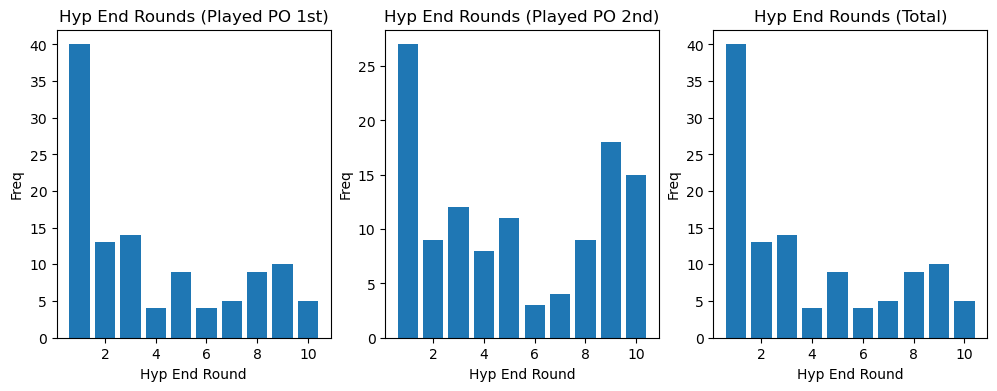

In [41]:
fig, axs = plt.subplots(1,3, figsize = (12,4))
m1 = b2data['hyp_po_end_round'].value_counts().sort_index()
axs[0].bar(m1.index, m1)

# Add labels and title
axs[0].set_xlabel('Hyp End Round')
axs[0].set_ylabel('Freq')
axs[0].set_title('Hyp End Rounds (Played PO 1st)')

m2 = b1data['hyp_po_end_round'].value_counts().sort_index()
axs[1].bar(m2.index, m2)

# Add labels and title
axs[1].set_xlabel('Hyp End Round')
axs[1].set_ylabel('Freq')
axs[1].set_title('Hyp End Rounds (Played PO 2nd)')

m3 = df['hyp_po_end_round'].value_counts().sort_index()
axs[2].bar(m3.index, m1)

# Add labels and title
axs[2].set_xlabel('Hyp End Round')
axs[2].set_ylabel('Freq')
axs[2].set_title('Hyp End Rounds (Total)')
# Show the plot
fig.show()

**BO vs. PO**

Build retention matrix of  BO end round vs hypothetical PO end round

In [42]:
b1data = df[df['po1_g1'].isnull()] # game 1 was Banker's Offer
b1data = b1data[['end_round_g1', 'hyp_po_end_round']]
b1data = b1data.rename(columns={'end_round_g1': 'BO_end_round',
                               'hyp_po_end_round': 'hyp_PO_end_round'})
b1data.head()

,BO_end_round,hyp_PO_end_round
1,3,9
7,10,9
10,1,2
13,3,1
16,1,1


Isolate games with BO 2nd game and create tupl in same order as first

In [43]:
b2data = df[df['po1_g2'].isnull()] # game 2 was Banker's Offer
b2data = b2data[['hyp_po_end_round', 'end_round_g2']]
b2data = b2data.rename(columns= {'hyp_po_end_round': 'hyp_PO_end_round',
                                'end_round_g2': 'BO_end_round'})
b2data.head()

,hyp_PO_end_round,BO_end_round
175,10,10
0,3,1
2,7,5
3,9,10
4,1,1


In [44]:
comb_v = pd.concat([b1data, b2data])
comb_v.shape

(231, 2)

In [57]:
from collections import Counter
hyp_round_retention = []
d = Counter(comb_v['hyp_PO_end_round'])
for i in range(1,10):
    print('{} has occurred {} times'.format(i, d[i]))

1 has occurred 67 times
2 has occurred 22 times
3 has occurred 26 times
4 has occurred 12 times
5 has occurred 20 times
6 has occurred 7 times
7 has occurred 9 times
8 has occurred 18 times
9 has occurred 28 times


In [66]:
hyp_round_retention = []
d = Counter(comb_v['hyp_PO_end_round'])
def count(i):
    if i==1:
        hyp_round_retention.append(len(comb_v.index))
        return len(comb_v.index)
    else:
        prev = count(i-1)
        hyp_round_retention.append(prev-d[i-1])
        return prev-d[i-1]
        
count(9)
print(hyp_round_retention)

[231, 164, 142, 116, 104, 84, 77, 68, 50]


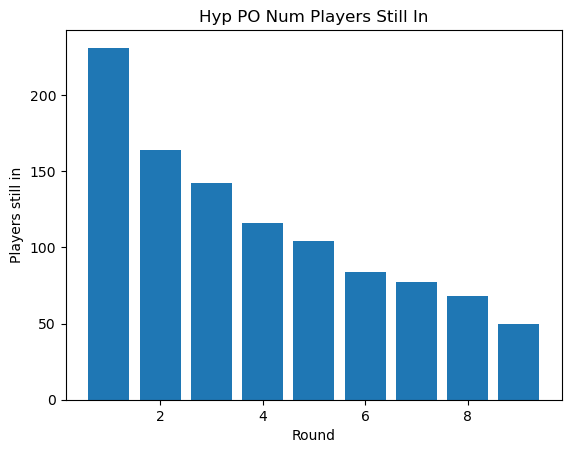

In [68]:
plt.bar(range(1,10), hyp_round_retention)
plt.xlabel("Round")
plt.ylabel("Players still in")
plt.title("Hyp PO Num Players Still In")
plt.show()

In [45]:
vtuple_counts = comb_v.groupby(['BO_end_round', 'hyp_PO_end_round']).size().reset_index(name='count')
vtuple_counts = vtuple_counts.fillna(0)
vtuple_counts

,BO_end_round,hyp_PO_end_round,count
0,1,1,35
1,1,2,10
2,1,3,8
3,1,4,3
4,1,5,2
...,...,...,...
65,10,6,3
66,10,7,1
67,10,8,5
68,10,9,5


In [46]:
vheatmap_data = vtuple_counts.pivot(index='BO_end_round', columns='hyp_PO_end_round', values='count')
vheatmap_data.fillna(0)
vheatmap_data

hyp_PO_end_round,1,2,3,4,5,6,7,8,9,10
BO_end_round,,,,,,,,,,
1,35.0,10.0,8.0,3.0,2.0,1.0,2.0,NaN,1.0,2.0
2,10.0,3.0,3.0,3.0,NaN,2.0,NaN,1.0,4.0,NaN
3,5.0,4.0,9.0,3.0,6.0,NaN,1.0,4.0,7.0,1.0
4,3.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,3.0,3.0
5,3.0,1.0,1.0,NaN,NaN,NaN,4.0,1.0,2.0,4.0
6,1.0,NaN,NaN,NaN,3.0,1.0,NaN,2.0,1.0,2.0
7,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0
8,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,2.0,2.0
9,4.0,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0,NaN


### BO winnings vs hyp PO winnings

In [47]:
df['hyp_PO_winnings'] = 0
b1data = df[df['po1_g1'].isnull()].copy() # game 1 was Banker's Offer, game 2 was Player's Offer
b2data = df[df['po1_g2'].isnull()].copy() # game 1 was Player's Offer, game 2 was Banker's Offer
print(len(b1data.index), len(b2data.index))

117 114


In [48]:
for index, row in b1data.iterrows(): # player's offer is round 2
    if row['hyp_po_end_round']!=10:
        b1data.loc[index, 'hyp_PO_winnings'] = row['po' + str(row['hyp_po_end_round']) + '_g2'] # player's offer at hypothetical end round
    else: # no player's offer is ever accepted
        b1data.loc[index, 'hyp_PO_winnings'] = row['winnings_g2']

In [49]:
for index, row in b2data.iterrows(): # player's offer is round 2
    if row['hyp_po_end_round']!=10:
        b2data.loc[index, 'hyp_PO_winnings'] = row['po' + str(row['hyp_po_end_round']) + '_g1'] # player's offer at hypothetical end round
    else: # no player's offer is ever accepted
        b2data.loc[index, 'hyp_PO_winnings'] = row['winnings_g1']

In [50]:
def safe_log(x):
    if x > 0:
        return math.log10(x)
    else:
        return 0
    
b1data['BO_winnings_log10'] = b1data['winnings_g1'].apply(safe_log)
b2data['BO_winnings_log10'] = b2data['winnings_g2'].apply(safe_log)
df = pd.concat([b1data,b2data])
df['hyp_PO_winnings_log10'] = df['hyp_PO_winnings'].apply(safe_log)


In [79]:
wdescr = pd.concat([pd.concat([b1data['winnings_g1'], b2data['winnings_g2']]).describe(), #BO
                   df['BO_winnings_log10'].describe(), #BOlog10
                   df['hyp_PO_winnings'].describe(), # PO
                   df['hyp_PO_winnings_log10'].describe()], # POlog10
                  axis = 1
                  )
# comb_bwinnings = pd.concat([b1data['winnings_g1'], b2data['winnings_g2']]) # BO
# comb_pwinnings = pd.concat([b2data['hyp_PO_winnings'], b1data['hyp_PO_winnings']]) # PO
# comb_bwinnings_log10 = pd.concat([b1data['winnings_g1_log10'], b2data['winnings_g2_log10']])
# comb_pwinnings_log10 = pd.concat([b2data['winnings_g1_log10'], b1data['winnings_g2_log10']])
# wb = comb_bwinnings.describe()
# wp = comb_pwinnings.describe()
# wblog = comb_bwinnings_log10.describe()
# wplog = comb_pwinnings_log10.describe()
# wdescr = pd.concat([wb, wblog, wp, wplog], axis = 1)
wdescr.columns = ['BO winnings', 'BO winnings_log10', 'hyp_PO winnings', 'hyp_PO winnings_log10']
wdescr

,BO winnings,BO winnings_log10,hyp_PO winnings,hyp_PO winnings_log10
count,231.000000,231.000000,231.000000,231.000000
mean,86760.212165,4.501984,32696.536840,3.129101
std,134161.804591,0.976205,93350.890564,1.461105
min,0.010000,-2.000000,0.000000,-2.000000
25%,28479.500000,4.454532,100.000000,2.000000
50%,45492.000000,4.657935,1500.000000,3.176091
75%,94914.000000,4.977298,11000.000000,4.039591
max,1000000.000000,6.000000,1000000.000000,6.000000


## Duration

In [69]:
qualtrics1 = pd.read_csv('Decision Making_October 9, 2023_00.39.csv')
qualtrics2 = pd.read_csv('Decision Making_December 15, 2023_11.44.csv')
qualtrics1.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q31,Q30,Q29,Q28,Q27,Q26,Q8,Q22,Q22.1,Q23
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,If the chance of getting a disease is 20 out o...,"Imagine that we roll a fair, six-sided die 100...","In the BIG BUCKS LOTTERY, the chances of winni...","In the ACME PUBLISHING SWEEPSTAKES, the chance...","In a lake, there is a patch of lily pads. Ever...",If it takes five machines 5 minutes to make fi...,Suppose you have a close friend who has a lump...,Are you familiar with the game Deal or No Deal?,Enter your first game ID (G#####),Enter your second game ID (G#####)
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID34_TEXT""}","{""ImportId"":""QID33_TEXT""}","{""ImportId"":""QID32_TEXT""}","{""ImportId"":""QID31_TEXT""}","{""ImportId"":""QID30_TEXT""}","{""ImportId"":""QID29_TEXT""}","{""ImportId"":""QID7_TEXT""}","{""ImportId"":""QID22""}","{""ImportId"":""QID25_TEXT""}","{""ImportId"":""QID26_TEXT""}"
2,2023-06-16 11:44:54,2023-06-16 11:47:35,IP Address,24.228.238.109,78,161,False,2023-06-23 11:47:40,R_3su0Ltne29zNSjJ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
3,2023-07-05 13:02:23,2023-07-05 13:12:28,IP Address,47.155.28.7,81,605,False,2023-07-12 13:12:33,R_V3adGClNwIKHEKR,NaN,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2023-08-24 21:46:46,2023-08-24 21:47:49,IP Address,68.181.16.181,100,62,True,2023-08-24 21:47:50,R_reia0IEJiOWKfT3,NaN,...,1000,1000,1000,1000,1000,10000,10000,No,3,3


Delete all unfinished entries and with progress not equal to 100

In [70]:
print(type(qualtrics1['Finished'][0]), type(qualtrics1['Progress'][0]), len(qualtrics1.index))

<class 'str'> <class 'str'> 395


In [71]:
qualtrics1 = qualtrics1[(qualtrics1['Finished']=="True") & (qualtrics1['Progress']=="100")]

In [72]:
len(qualtrics1.index)

330

Do the same for qualtrics2

In [73]:
qualtrics2.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q30,Q29,Q28,Q27,Q26,Q8,Q22,Q22.1,Q23,id
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,"Imagine that we roll a fair, six-sided die 100...","In the BIG BUCKS LOTTERY, the chances of winni...","In the ACME PUBLISHING SWEEPSTAKES, the chance...","In a lake, there is a patch of lily pads. Ever...",If it takes five machines 5 minutes to make fi...,Suppose you have a close friend who has a lump...,Are you familiar with the game Deal or No Deal?,Enter your first game ID (G#####),Enter your second game ID (G#####),id
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID33_TEXT""}","{""ImportId"":""QID32_TEXT""}","{""ImportId"":""QID31_TEXT""}","{""ImportId"":""QID30_TEXT""}","{""ImportId"":""QID29_TEXT""}","{""ImportId"":""QID7_TEXT""}","{""ImportId"":""QID22""}","{""ImportId"":""QID25_TEXT""}","{""ImportId"":""QID26_TEXT""}","{""ImportId"":""id""}"
2,11/12/2023 23:39,11/12/2023 23:46,0,75.83.34.247,100,421,1,11/12/2023 23:46,R_2feS88wmBtXIql3,NaN,...,50,10,0.1,7,100,90,1,G23350,G21032,28236
3,11/13/2023 0:34,11/13/2023 0:55,0,47.154.19.234,100,1262,1,11/13/2023 0:55,R_3QMLlo4DfKrKlq1,NaN,...,500,10,0.10%,47,5 minutes,50%,1,G66335,G70539,25652
4,11/13/2023 11:44,11/13/2023 11:59,0,207.151.52.217,100,859,1,11/13/2023 11:59,R_pJWmZqiXedP9AYx,NaN,...,500,10,0.10%,24,100 min,90%,2,G50365,G64023,28150


In [74]:
qualtrics2 = qualtrics2[(qualtrics2['Finished']=="1") & (qualtrics2['Progress']=="100")]

In [75]:
oldstats = pd.to_numeric(qualtrics1['Duration (in seconds)']).describe()
newstats = pd.to_numeric(qualtrics2['Duration (in seconds)']).describe()
durstats = pd.concat([oldstats, newstats], axis=1)
durstats.columns = ['Old data duration (s)', 'New data duration(s)']

In [76]:
durstats

,Old data duration (s),New data duration(s)
count,330.000000,192.000000
mean,4059.918182,8519.369792
std,35699.129939,56587.759847
min,62.000000,111.000000
25%,392.500000,454.000000
50%,582.000000,580.000000
75%,923.000000,790.750000
max,583801.000000,530741.000000


Participants are taking just under 10 minutes (includes objective numeracy questions)